In [23]:
# Import Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the data from database
file_path = './Resources/clean_beer.csv'
beer_df = pd.read_csv(file_path)
beer_df.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style,beer_abv
0,4.0,4.0,3.5,4.0,4.0,Rauchbier,7.4
1,3.5,3.5,3.5,3.5,3.5,American IPA,6.1
2,1.0,3.0,3.0,1.5,1.5,Euro Pale Lager,5.0
3,2.5,3.0,4.0,4.0,3.5,Witbier,4.8
4,3.5,4.0,4.0,3.5,3.5,American Porter,6.0


In [3]:
# Create features
X = beer_df.drop(['review_overall', 'beer_style'], axis = 1).values
# Create target
y = beer_df['review_overall'].values

In [ ]:
X

In [ ]:
y

In [4]:
# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [18]:
# Train the model
# Multiple linear regression
ml=LinearRegression()
ml.fit(X_train, y_train)
Training_score = ml.score(X_train, y_train)
Testing_score = ml.score(X_test, y_test)
print(f'Training score : {Training_score}')
print(f'Testing score : {Testing_score}')

Training score : 0.6559853239770468
Testing score : 0.6624405757076235


In [19]:
y_pred = ml.predict(X_test)

In [20]:
df = pd.DataFrame({'Predicted' : y_pred, 'Actual' : y_test})
df.head(20)

,Predicted,Actual
0,3.603794,3.5
1,3.766743,4.0
2,2.709960,2.5
3,3.611775,4.0
4,3.076504,3.0
5,3.341740,3.5
6,3.239877,3.0
7,3.146788,3.5
8,4.088877,4.0
9,3.974863,4.5


In [ ]:
# Evaluate the model

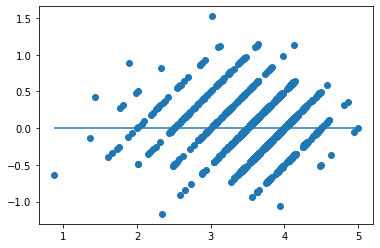

In [21]:
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [ ]:
beer_df.head(20)

In [22]:
print(ml.coef_)

[ 0.06458525  0.05631196  0.34186063  0.65338935 -0.01140138]


In [25]:
mean_squared_error(y_pred, y_test)

0.12541637788706683

In [26]:
beer_df2 = beer_df[['review_overall', 'review_palate', 'review_taste']]
beer_df2.head()

,review_overall,review_palate,review_taste
0,4.0,4.0,4.0
1,3.5,3.5,3.5
2,1.0,1.5,1.5
3,2.5,4.0,3.5
4,3.5,3.5,3.5


In [27]:
# Create features
X = beer_df2.drop(['review_overall'], axis = 1).values
# Create target
y = beer_df2['review_overall'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [29]:
# Train the model
# Multiple linear regression
ml2=LinearRegression()
ml2.fit(X_train, y_train)
Training_score = ml2.score(X_train, y_train)
Testing_score = ml2.score(X_test, y_test)
print(f'Training score : {Training_score}')
print(f'Testing score : {Testing_score}')

Training score : 0.6512065521608066
Testing score : 0.6564514924807601


In [30]:
y_pred = ml2.predict(X_test)

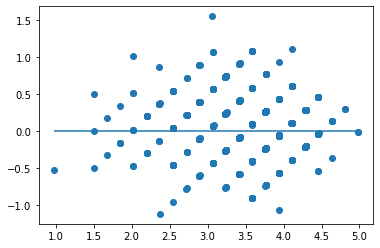

In [31]:
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()

In [32]:
print(ml2.coef_)

[0.3557091  0.69046028]


In [33]:
mean_squared_error(y_pred, y_test)

0.12764155387423404

In [5]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_inupt_features = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20
nn = tf.keras.models.Sequential()
# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_inupt_features, activation='relu'))
# Second Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             input_dim=number_inupt_features, activation='relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1,
                            activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["MSE"])

In [17]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
126/126 [==============================] - 0s 451us/step - loss: -61.2310 - MSE: 7.4120
Epoch 2/100
126/126 [==============================] - 0s 447us/step - loss: -602.0134 - MSE: 7.3955
Epoch 3/100
126/126 [==============================] - 0s 463us/step - loss: -2550.5945 - MSE: 7.3955
Epoch 4/100
126/126 [==============================] - 0s 459us/step - loss: -6842.0356 - MSE: 7.3955
Epoch 5/100
126/126 [==============================] - 0s 457us/step - loss: -14295.2363 - MSE: 7.3955
Epoch 6/100
126/126 [==============================] - 0s 463us/step - loss: -25792.5156 - MSE: 7.3955
Epoch 7/100
126/126 [==============================] - 0s 507us/step - loss: -42318.1016 - MSE: 7.3955
Epoch 8/100
126/126 [==============================] - 0s 487us/step - loss: -64304.9258 - MSE: 7.3955
Epoch 9/100
126/126 [==============================] - 0s 535us/step - loss: -92272.6406 - MSE: 7.3955
Epoch 10/100
126/126 [==============================] - 0s 495us/step - loss: -1

126/126 [==============================] - 0s 431us/step - loss: -27149766.0000 - MSE: 7.3955
Epoch 79/100
126/126 [==============================] - 0s 455us/step - loss: -28019304.0000 - MSE: 7.3955
Epoch 80/100
126/126 [==============================] - 0s 447us/step - loss: -28906342.0000 - MSE: 7.3955
Epoch 81/100
126/126 [==============================] - 0s 463us/step - loss: -29810022.0000 - MSE: 7.3955
Epoch 82/100
126/126 [==============================] - 0s 463us/step - loss: -30731648.0000 - MSE: 7.3955
Epoch 83/100
126/126 [==============================] - 0s 487us/step - loss: -31670722.0000 - MSE: 7.3955
Epoch 84/100
126/126 [==============================] - 0s 495us/step - loss: -32626496.0000 - MSE: 7.3955
Epoch 85/100
126/126 [==============================] - 0s 503us/step - loss: -33600384.0000 - MSE: 7.3955
Epoch 86/100
126/126 [==============================] - 0s 524us/step - loss: -34591572.0000 - MSE: 7.3955
Epoch 87/100
126/126 [============================